# Prerequisite verification notebook

This notebook will make sure that you have all the required software installed, and that you have enough knowledge to proceed with the workshop. Note that we will not provide support for missing libraries or non-working code. It is up to you to make sure that everything works.

This notebook contains two parts. The first part "Software" will make sure that you have all the software installed and working. See the [README.md](README.md) file for more information about the setup.

The second part of this notebook is called "Knowledge." It checks whether you know what you are doing. Go through the examples, and make sure you understand what's going one. I will not be able to explain matplotlib internals during this workshop. You'll find useful links at the beginning of the second part.

Don't forget to answer the pre-workshop survey! Help me help you http://bit.ly/ds2018dataviz :-)



## Software

Making sure you have the right setup

In [1]:
import sys
from matplotlib import pylab as plt
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.display import Image
import urllib
from bidi import algorithm as bidialg # Needed to handle Hebrew in plots. Install using `pip install python-bidi`
from scipy.stats import gaussian_kde
%matplotlib notebook

Let's make sure you have the right versions

In [2]:
assert sys.version_info.major > 2, "You can't be serious! It's 2020"

In [3]:
assert sys.version_info.minor >= 6, "I like f-strings and use them a lot"

In [4]:
import matplotlib
assert matplotlib.__version__ >= '2.1', f"See this page to learn why you should update your matplotlib https://matplotlib.org/users/dflt_style_changes.html"

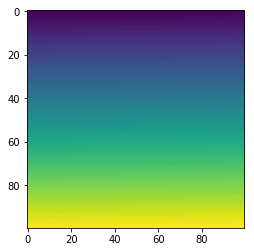

In [5]:
m = np.linspace(0, 100, 100*100).reshape(100, 100)
plt.imshow(m)

The above cell should have created a nice "heatmap" with yellow-green-blue gradient. If you can't see a graph that looks like the one below, something is wrong with your installation.

<img src="./demos/figures/heatmap.png" alt="Heatmap" style="width: 320px;"/>

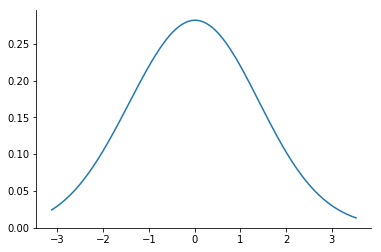

In [6]:
def kdeplot(data, ax=None, **kwargs):
    density = gaussian_kde(data)
    xs = np.linspace(np.min(data), 
                     np.max(data), 
                     kwargs.pop('numpoints', 200)
                    )
    covariance_factor = kwargs.pop(
        'covariance_factor', 1
    )
    density.covariance_factor = lambda : covariance_factor
    density._compute_covariance()
    if ax is None:
        fig, ax = plt.subplots()
    title = kwargs.pop('title', None)

    ax.plot(xs,density(xs), **kwargs)
    if title is not None:
        ax.set_ylabel(title, 
                      rotation=0, 
                      y=0.75, 
                      ha='right', 
                      fontsize='x-large')
    sns.despine(ax=ax)
    return ax
kdeplot(np.random.randn(1000))

The above cell should create a nice bell curve. 

## Knowledge
Go through the examples below. Do you understand what they do? Can you modify these examples to fit your needs? If you can't, you should do some homework **before** the workshop, or cancel your registration. Unfortunately, I won't be able to teach how to use the libraries. 


### Pandas

Pandas is THE libary to work with data tables in Python. 
Following are useful tutorials that will give you enough background

* [10 minutes to Pandas](https://pandas.pydata.org/pandas-docs/stable/10min.html)
* [Intro to Pandas: -1 : An absolute beginners guide to Machine Learning and Data science](https://pandas.pydata.org/pandas-docs/stable/10min.html)

In [9]:
tbl = pd.DataFrame({'alpha': np.linspace(0, 20, 100)})
tbl['sine'] = np.sin(tbl.alpha)
tbl['cosine'] = np.cos(tbl.alpha)
tbl.head()

,alpha,sine,cosine
0,0.000000,0.000000,1.000000
1,0.202020,0.200649,0.979663
2,0.404040,0.393137,0.919480
3,0.606061,0.569634,0.821898
4,0.808081,0.722963,0.690887


### matplotlib

Matplotlib is THE libary to generate static graphs in Python. 

* [Introduction to Object-oriented matplolib intefrace](http://jakevdp.github.io/mpl_tutorial/tutorial_pages/tut2.html). There are two ways to interact with matplotlib. The first one ("Matlab-style") uses a set of high-level functions. The second one is more "Pythonic" and more powerful. I will mostly use the latter.

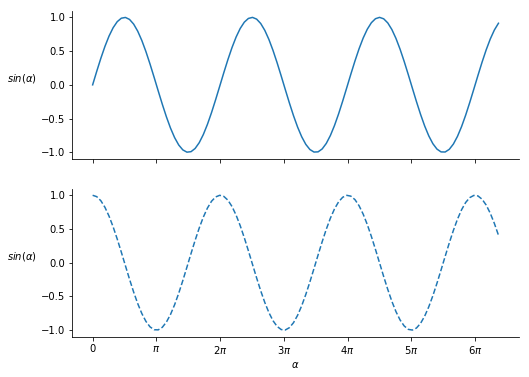

In [8]:
fig, axes = plt.subplots(2, 1, figsize=(8,6), sharex=True)
ax = axes[0]
ax.plot(tbl.alpha, tbl.sine, '-')
ax.set_ylabel('$sin(\\alpha)$', rotation='horizontal', ha='right', ma='left')

ax = axes[1]
ax.plot(tbl.alpha, tbl.cosine, '--')
ax.set_xlabel('$\\alpha$')
ax.set_ylabel('$sin(\\alpha)$', rotation='horizontal', ha='right', ma='left')
tks = np.arange(0, 7*np.pi, np.pi)
lbls = [f'{i}$\\pi$' for i in range(len(tks))]
lbls[0] = 0
lbls[1] = '$\\pi$'
ax.set_xticks(tks)
ax.set_xticklabels(lbls)
[sns.despine(ax=ax) for ax in axes]
None